# K-Means clustering

In [1]:
# %load ../standard_import.txt
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
from sklearn.preprocessing import scale #用来对数据预处理，包括无量纲化，特征二值化，定性数据量化等
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy

%matplotlib inline
plt.style.use('seaborn-white')

## Generate the data

In [4]:
np.random.seed(2)

In [5]:
X=np.random.standard_normal((50,2))

In [6]:
X[:25,0]=X[:25,0]+3
X[:25,1]=X[:25,1]-4

### k=2

In [7]:
km1=KMeans(n_clusters=2, n_init=20)

In [9]:
km1.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=20, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [10]:
km1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1], dtype=int32)

In [13]:
pd.Series(km1.labels_).value_counts()

1    26
0    24
dtype: int64

### k=3

In [11]:
np.random.seed(4)
km2=KMeans(n_clusters=3,n_init=20)
km2.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=20, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [12]:
km2.labels_

array([1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 2], dtype=int32)

In [15]:
pd.Series(km2.labels_).value_counts()

1    21
0    20
2     9
dtype: int64

In [16]:
km2.cluster_centers_

array([[-0.27876523,  0.51224152],
       [ 2.82805911, -4.11351797],
       [ 0.69945422, -2.14934345]])

In [17]:
# Sum of distances of samples to their closest cluster center.
km2.inertia_

68.97379200939726

### plot the results for k=2 and k=3

Text(0.5, 1.0, 'K-means clustering result with k=3')

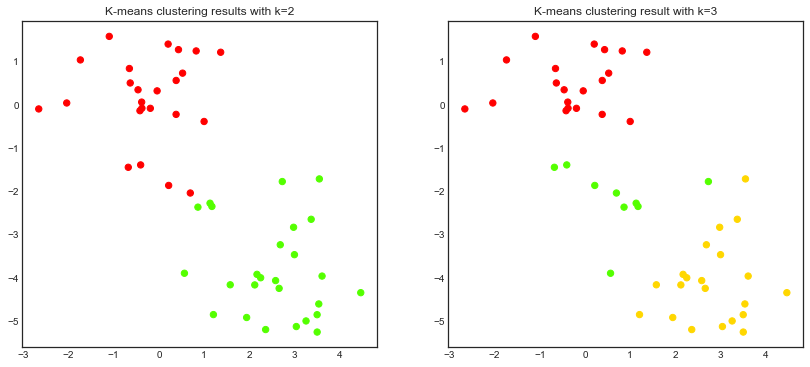

In [22]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,6))## set up the plot
ax1.scatter(X[:,0],X[:,1], s=40, c=km1.labels_, cmap=plt.cm.prism)
ax1.set_title('K-means clustering results with k=2')

ax2.scatter(X[:,0], X[:,1], s=40, c=km2.labels_,cmap=plt.cm.prism)
ax2.set_title('K-means clustering result with k=3')

In [23]:
np.random.seed(3)

In [24]:
km3=KMeans(n_clusters=3, n_init=1)
km3.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=1, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [25]:
km3.labels_

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 0], dtype=int32)

In [26]:
pd.Series(km3.labels_).value_counts()

1    21
2    19
0    10
dtype: int64

In [27]:
km3.inertia_

69.30698623331516

In [40]:
def within_sum_of_squares(data, centroids, labels):
    """
    Compute total sum of squares of a prototype clustering
    algorithm.
    """

    SSW = 0
    for l in np.unique(labels):
        data_l = data[labels == l]
        resid = data_l - centroids[l]
        SSW += (resid**2).sum()
    return SSW

In [41]:
within_sum_of_squares(X, km3.cluster_centers_, km3.labels_)

69.30698623331517

# Hierachical Clustering

Text(0.5, 1.0, 'Single Linkage')

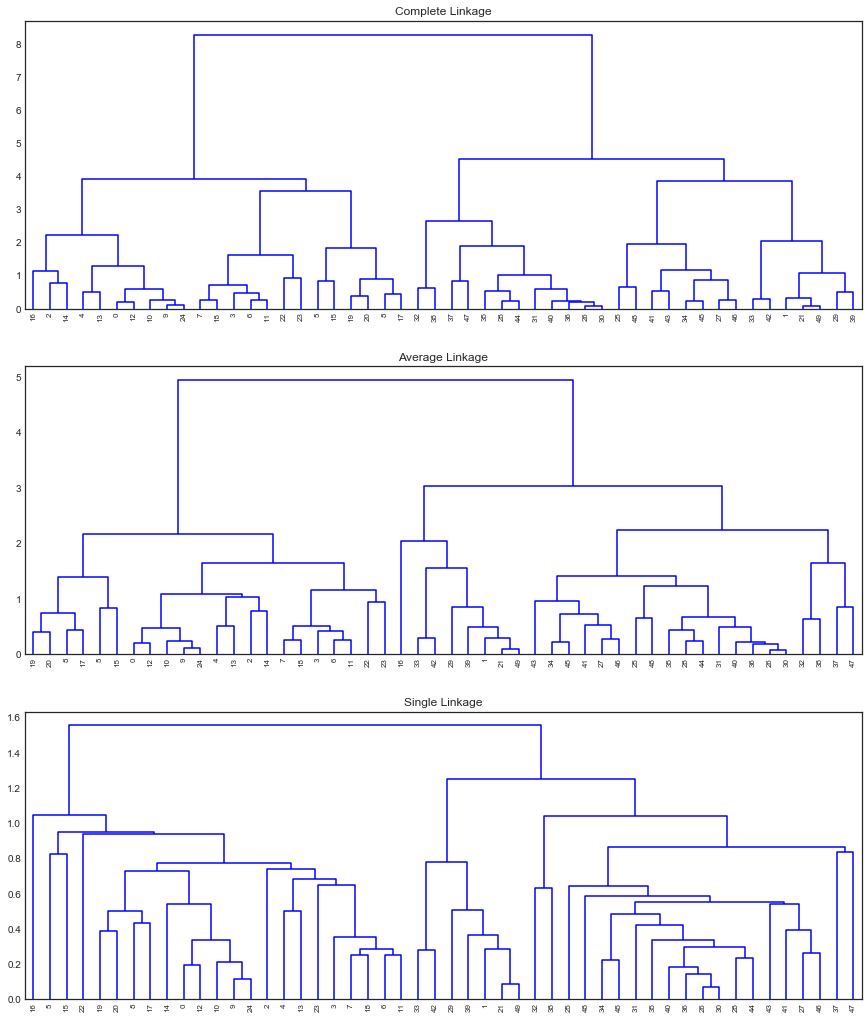

In [39]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,18))

for linkage, cluster, ax in zip([hierarchy.complete(X), hierarchy.average(X), hierarchy.single(X)], ['c1','c2','c3'],
                                [ax1,ax2,ax3]):
    cluster = hierarchy.dendrogram(linkage, ax=ax, color_threshold=0)

ax1.set_title('Complete Linkage')
ax2.set_title('Average Linkage')
ax3.set_title('Single Linkage')